In [6]:
%load_ext blackcellmagic
import euclid_obssys as eo
%cd /data101/lavaux/Euclid
import logging
logging.basicConfig(level=logging.INFO)
logging.getLogger("pinocchio").setLevel("INFO")

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
/automnt/data101/lavaux/Euclid


In [7]:
repo="RepoLarge2"
eo.pipeline.createProjectDirectoryTree(repo)

# Starting up 'createProjectDirectoryTree'
Project: RepoLarge2
  creating RepoLarge2/Selections
  creating RepoLarge2/Catalogs4LE3
  creating RepoLarge2/GalaxyCatalogs
  creating RepoLarge2/Plots
  creating RepoLarge2/Cls
  creating RepoLarge2/Footprints
  creating RepoLarge2/SDHOD
  creating RepoLarge2/NumberCounts
  creating RepoLarge2/RandomCatalogs
  creating RepoLarge2/2PCF
  creating RepoLarge2/2PCF/Measures
  creating RepoLarge2/2PCF/Params
  creating RepoLarge2/2PCF/Scripts
  creating RepoLarge2/PK
  creating RepoLarge2/PK/Measures
  creating RepoLarge2/PK/Params
  creating RepoLarge2/PK/Scripts
  creating RepoLarge2/CM-PK
  creating RepoLarge2/CM-PK/Measures
  creating RepoLarge2/CM-PK/Params
  creating RepoLarge2/CM-PK/Scripts
  creating RepoLarge2/3PCF
  creating RepoLarge2/3PCF/Measures
  creating RepoLarge2/3PCF/Params
  creating RepoLarge2/3PCF/Scripts
  creating RepoLarge2/BK
  creating RepoLarge2/BK/Measures
  creating RepoLarge2/BK/Params
  creating RepoLarge2/BK/Scrip

INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = RING in fits file
INFO:healpy:INDXSCHM = IMPLICIT


0.37616082032521564


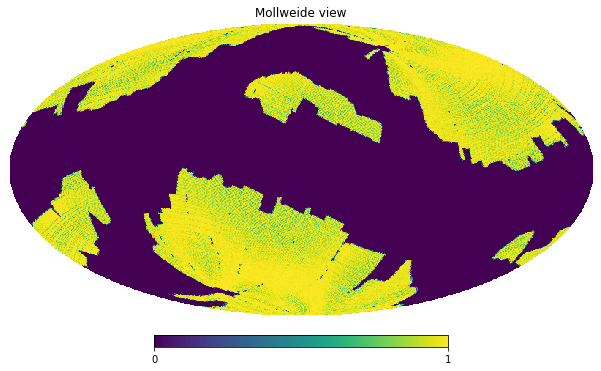

In [8]:
import shutil

shutil.copy(src="CommonData/map_WIDE_SURVEY.fits", dst=f"{repo}/Footprints/")
shutil.copy(src="CommonData/SDHOD_8614_m3_smL5_cMdiemer19.fits", dst=f"{repo}/SDHOD/")
shutil.copytree(src="CommonData/ExtinctionMaps", dst=f"{repo}/ExtinctionMaps/", dirs_exist_ok=True)
shutil.copytree(src="CommonData/SelectionInputs", dst=f"{repo}/SelectionInputs/", dirs_exist_ok=True)
import healpy as hp
import numpy as np
wide=hp.read_map(f"{repo}/Footprints/map_WIDE_SURVEY.fits")
print(wide.sum()/wide.size)

hp.mollview(wide)

In [9]:
import os

os.environ["NUMEXPR_MAX_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"]="8"
config=f"myconf_{repo}.py"
pinocchio=True
#eo.pipeline.generateConfig(config, footprintTag="Full", repodir=repo, projectdir="TestLargeProject_2")
## Now myconf_RepoLarge2.py has to be hacked
##    read_footprint_Granett
##    pinocchio_repo
##    pinocchio_rotator
##    first_run/last_run

In [ ]:
if not pinocchio:
    eo.pipeline.extractGalaxyCatalogFromMaster(config)
    eo.pipeline.createIndicesForSats(config)
    eo.pipeline.createSmoothHOD(config)
    eo.pipeline.applyFootprintToMaster(config)
else:
    eo.pipeline.createHODFromPinocchio(config, 201, 201, hack=True)

# Starting up 'createHODFromPinocchio'


INFO:tools:Starting dask
2022-09-01 08:49:53,943 - distributed.diskutils - INFO - Found stale lock file and directory '/automnt/data101/lavaux/Euclid/dask-worker-space/worker-jxgt_51d', purging
INFO:tools:DASK is available at 'http://127.0.0.1:8787/status'
INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = RING in fits file
INFO:healpy:INDXSCHM = IMPLICIT
INFO:pinocchio:The catalog is written in 81 files
INFO:pinocchio:opening file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.0


# Catalog type is 'pinocchio'
# Running createSDHODfromPinocchio.py from Pinocchio with myconf_RepoLarge2.py
# Loading footprint from RepoLarge2//Footprints/map_WIDE_SURVEY.fits...
# Reading the HOD table RepoLarge2/SDHOD/SDHOD_8614_m3_smL5_cMdiemer19.fits...

# -- starting with catalog 201 --
# Reading plc from file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out
#  Using new reader


INFO:pinocchio:Detected dtype for the catalog: [('name', <class 'numpy.uint64'>), ('truez', <class 'numpy.float32'>), ('Mass', <class 'numpy.float32'>), ('theta', <class 'numpy.float32'>), ('phi', <class 'numpy.float32'>), ('obsz', <class 'numpy.float32'>), ('pad', <class 'numpy.float32'>)]
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.0
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.1
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.2
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.3
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pinocchio.EuclidLargeBox0201.plc.out.4
INFO:pinocchio:reading file /data101/lavaux/Euclid/EuclidLargeBox/EuclidLargeBox0201/pin

In [7]:
#eo.pipeline.createSelection(config)

In [8]:
eo.pipeline.createSelection(config, run_number=201)

INFO:healpy:NSIDE = 2048
INFO:healpy:ORDERING = NESTED in fits file
INFO:healpy:No INDXSCHM keyword in header file: assume IMPLICIT
INFO:healpy:INDXSCHM = IMPLICIT


# Starting up 'createSelection'
# Catalog type is 'pinocchio'
# Running createSelection.py with myconf_RepoLarge2.py
# I will process run number 201
# Selection will be applied to the data catalog
# Catalog type is 'None'
Opening galaxy catalog /automnt/data101/lavaux/Euclid/TestLargeProject_2/GalaxyCatalogs/EuclidLargeBox0201_Wide.fits...
{'catalog': 1}
The catalog contains 14856564 galaxies
# applying extinction...
# loading reddening map RepoLarge2/ExtinctionMaps/HFI_CompMap_ThermalDustModel_2048_R1.20.fits...


INFO:healpy:Ordering converted to RING


# finding pixels for galaxies...
# computing extinction...
# constructing selection...
# Writing file /automnt/data101/lavaux/Euclid/TestLargeProject_2/Selections/data_MWext_EuclidLargeBox0201_Wide.fits...
# Done!


In [9]:
eo.pipeline.dN_dZ(config)

INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = RING in fits file
INFO:healpy:INDXSCHM = IMPLICIT


# Starting up 'dN_dZ'
# Running dndz.py with myconf_RepoLarge2.py
# Catalog type is 'pinocchio'
# Loading footprint from RepoLarge2//Footprints/map_WIDE_SURVEY.fits...
# setting binnings...
# loading catalog /automnt/data101/lavaux/Euclid/TestLargeProject_2/GalaxyCatalogs/EuclidLargeBox0201_Wide.fits...
{'catalog': 1}
# loading selection /automnt/data101/lavaux/Euclid/TestLargeProject_2/Selections/data_MWext_EuclidLargeBox0201_Wide.fits...
{'SELECTION': 1}
# Processing catalog...
# Writing results on file /automnt/data101/lavaux/Euclid/TestLargeProject_2/NumberCounts/dndz_MWext_EuclidLargeBox0201-0201_Wide.fits...
# done!


In [ ]:
eo.pipeline.createRandom(config)

INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = RING in fits file
INFO:healpy:INDXSCHM = IMPLICIT


# Starting up 'createRandom'
# Catalog type is 'pinocchio'
# Running createRandom.py with myconf_RepoLarge2.py
# Loading footprint from RepoLarge2//Footprints/map_WIDE_SURVEY.fits...
# Computing angular extent of footprint...
# I will populate an area with theta=[-0.009611,3.151203], phi=[-0.015989,6.293039]
# Assigning redshifts and fluxes...
{'dn_dz': 1}
# loading data catalog /automnt/data101/lavaux/Euclid/TestLargeProject_2/GalaxyCatalogs/EuclidLargeBox0201_Wide.fits to be used 51 times...
{'catalog': 1}
# Applying selection MWext to data...
{'SELECTION': 1}
    added 13803759 random galaxies, total: 703991609
    added 13803759 random galaxies, total: 717795368
    added 13803759 random galaxies, total: 731599127
    added 13803759 random galaxies, total: 745402886
    added 13803759 random galaxies, total: 759206645
    added 13803759 random galaxies, total: 773010404
    added 13803759 random galaxies, total: 786814163
    added 13803759 random galaxies, total: 800617922
    add

In [ ]:
eo.pipeline.writeCatalogs4LE3(config)

# Catalog type is 'pinocchio'
# Running angular_map.py
Plotting map of catalog /automnt/data101/lavaux/Euclid/TestLargeProject_2//GalaxyCatalogs/EuclidLargeBox0201_Wide.fits in z=[0,3]
Reading catalog...
{'catalog': 1}
Reading selection /automnt/data101/lavaux/Euclid/TestLargeProject_2//Selections/data_MWext_EuclidLargeBox0201_Wide.fits...
{'SELECTION': 1}
Filtering catalog...
Finding pixels for 13803759 galaxies...
Constructing map...


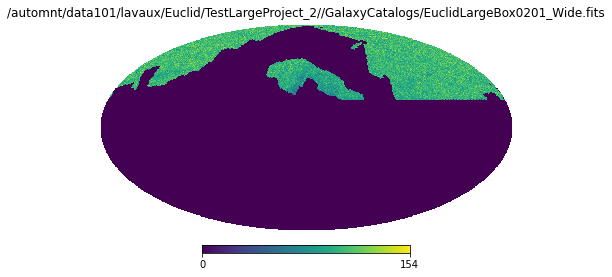

Done!


In [12]:
import euclid_obssys.view as evo
import euclid_obssys.view.angular_map as angmap

c = eo.config.readConfig(config)

angmap.angular_map(
    f"{c.project}/GalaxyCatalogs/EuclidLargeBox0201_Wide.fits",
    f"{c.project}/Selections/data_MWext_EuclidLargeBox0201_Wide.fits",
    0,
    3,
    Nside=512,
)

INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = RING in fits file
INFO:healpy:INDXSCHM = IMPLICIT


# Catalog type is 'pinocchio'
# Running plot_dndz.py with myconf_RepoLarge2.py
# Loading footprint from RepoLarge2//Footprints/map_WIDE_SURVEY.fits...
This survey covers 16951.003928918635 sq deg
Reading dndz from file /automnt/data101/lavaux/Euclid/TestLargeProject_2/NumberCounts/dndz_MWext_EuclidLargeBox0201-0201_Wide.fits
{'dn_dz': 1}
Reading random catalog /automnt/data101/lavaux/Euclid/TestLargeProject_2/RandomCatalogs/random_DSMWext_EuclidLargeBox0201-0201_Wide_nosm.fits...
{'catalog': 1}
## written image in file /automnt/data101/lavaux/Euclid/TestLargeProject_2/Plots/dndz_dsMWext_rsDSMWext_EuclidLargeBox0201-0201_Wide.png


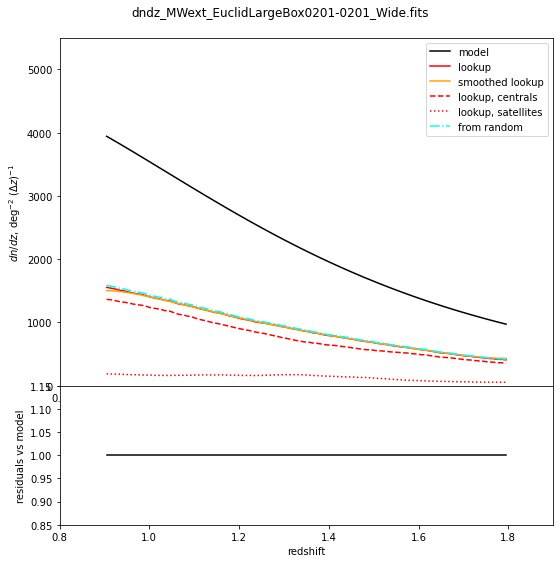

In [13]:
import euclid_obssys.view.dn_dz as view_dndz

view_dndz.dn_dz(config)